# CIFAR10 image classification

### Import libraries

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import os
from tensorflow.keras import datasets, layers, models
from keras.datasets import cifar10
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA

TensorFlow 2.x selected.


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### Configure paths

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = './drive/My Drive/cifar'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Download the CIFAR10 dataset

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

filename = os.path.join(path, 'classifier.sav')

170500096/170498071 [==============================] - 4s 0us/step


### Dimensionality Reduction

In [4]:
print('Training data and target sizes: \n{}, {}'.format(train_images.shape,train_labels.shape))
print('Test data and target sizes: \n{}, {}'.format(test_images.shape,test_labels.shape))

Training data and target sizes: 
(50000, 32, 32, 3), (50000, 1)
Test data and target sizes: 
(10000, 32, 32, 3), (10000, 1)


In [0]:
#Process the images to get an array

X_train = []
X_test = []
for img in train_images:
  img=(img.flatten())              
  X_train.append(np.array(img))
for img in test_images:
  img=(img.flatten())              
  X_test.append(np.array(img))
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.squeeze(train_labels[:50000, :])
y_test = np.squeeze(test_labels[:10000, :])

In [0]:
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(50000, 3072), (50000,)
Test data and target sizes: 
(10000, 3072), (10000,)


In [0]:
combined=np.vstack((X_train,X_test))

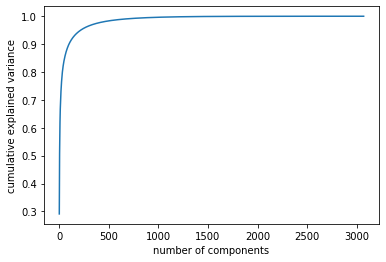

In [0]:
combined=np.vstack((X_train,X_test))
pca = PCA().fit(combined)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [0]:
for i in range(50,500,50):
  print(pca.explained_variance_ratio_.cumsum()[i])

0.8446995262214645
0.9017396812372269
0.9292411425729604
0.9460523077975068
0.9574793091250795
0.9656705623345976
0.9718504736434853
0.9766505678456937
0.9804398483602025


In [0]:
pca = PCA(n_components=100)
pca.fit(combined)
projected = pca.transform(combined)
print(pca.explained_variance_.shape)
print(pca.components_.shape)
print(combined.shape)
print(projected.shape)

(100,)
(100, 3072)
(60000, 3072)
(60000, 100)


In [0]:
X_train_reduced=projected[:10000,:]# 50000
y_train_reduced=y_train[:10000]
X_test_reduced=projected[50000:51000,:]# 50000:60000
y_test_reduced=y_test[:1000]
print(X_train_reduced.shape)
print(y_train_reduced.shape)
print(X_test_reduced.shape)
print(y_test_reduced.shape)

(10000, 100)
(10000,)
(1000, 100)
(1000,)


In [0]:
if os.path.exists(filename):
  classifier_model = joblib.load(filename)
  run = 'False'
  print("model loaded successfully")
else:
  run = 'True'

In [0]:
param_grid = [
  {'C': [1, 5, 10, 50], 'kernel': ['linear']},
  {'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005], 'kernel': ['rbf']},
 ]

In [0]:
svc = SVC()
grid = GridSearchCV(svc, param_grid, verbose = 3, cv = 3)
if run == 'True':
  grid.fit(X_train_reduced, y_train_reduced)
  print(grid.best_params_)

In [0]:
classifier = grid.best_estimator_
y_pred = classifier.predict(X_test)

if run == 'True':
  joblib.dump(classifier, filename)
  print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(X_test, y_pred))
else:
  result = classifier.score(X_test, y_pred)
  print("Classification report for classifier %s:\n%s\n"
      % (result)

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#print(cm)
import seaborn as sn
df_cm = pd.DataFrame(cm, range(len(cm)), range(len(cm)))
#ax= plt.subplot()
#sn.heatmap(df_cm, annot=True, ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(C, mask = mask, annot = True, cmap = cmap, vmax = .3, center = 0, square = True, linewidths = .5, cbar_kws = {"shrink": .5})
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

In [0]:
print(classifier.best_params_)

### Dataset preparation

In [0]:
# augment training set
datagen = tf.compat.v2.keras.preprocessing.image.ImageDataGenerator(rotation_range=15,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    #vertical_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1)
for i in range(len(train_images)):
  augment = datagen.random_transform(x=train_images[i],seed=i)
  train_images[i]=augment

# Normalize pixel values to be between 0 and 1
  
train_images, test_images = train_images/255.0, test_images / 255.0

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


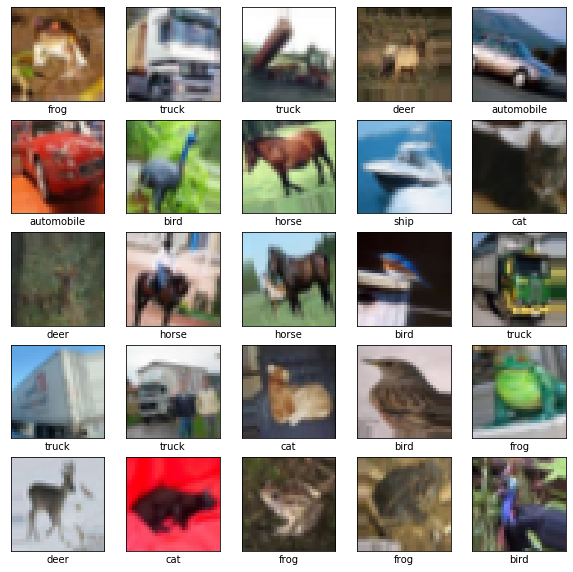

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels are arrays, 
    # which is why we need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Build the CNN model


In [0]:
# Build the network of vgg for 10 classes with massive dropout and weight decay as described in this paper: https://arxiv.org/pdf/1409.1556.pdf.
num_classes = 10
weight_decay = 0.0005
x_shape = [32,32,3]

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
        
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
        
model.add(layers.MaxPooling2D((2, 2)))
        
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
        
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
        
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(tf.compat.v2.keras.layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

### CNN model architecture


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       7

### Training parameters and calbacks


In [0]:
#training parameters
batch_size = 200
learning_rate = 0.1
lr_decay = 1e-6
lr_drop = 20

#optimization details
sgd = tf.compat.v2.keras.optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

if os.path.exists(os.path.join(path,'weights.hdf5')):
  model.load_weights(os.path.join(path,'weights.hdf5'))
  maxepochs = 150
  print("weights loaded successfully")
elif os.path.exists(os.path.join(path,'cifar10.h5')):
  model.load_weights(os.path.join(path,'cifar10.h5'))
  maxepochs = 1
  print("model loaded successfully")
else: 
  print ("Nothing to upload")
  maxepochs = 150

#callbacks
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(path,'weights.hdf5'), verbose = 0, save_best_only = True)

def lr_scheduler(epoch):
  return learning_rate * (0.5 ** (epoch // lr_drop))
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

weights loaded successfully


### Compile and train


In [0]:
history = model.fit(train_images, train_labels,batch_size=batch_size, 
                            steps_per_epoch=len(train_images) // batch_size,
                            epochs=maxepochs, validation_steps = len(test_images)// batch_size,
                            validation_data=(test_images, test_labels),callbacks=[reduce_lr, checkpointer],verbose=2)

model.save_weights(os.path.join(path,'cifar10.h5'))

Train on 50000 samples, validate on 10000 samples
Epoch 1/150
50000/50000 - 20s - loss: 2.2523 - accuracy: 0.5093 - val_loss: 2.0941 - val_accuracy: 0.5236
Epoch 2/150
50000/50000 - 16s - loss: 1.8411 - accuracy: 0.5994 - val_loss: 2.1522 - val_accuracy: 0.5069
Epoch 3/150
50000/50000 - 17s - loss: 1.6291 - accuracy: 0.6553 - val_loss: 1.5262 - val_accuracy: 0.6809
Epoch 4/150
50000/50000 - 16s - loss: 1.5202 - accuracy: 0.6874 - val_loss: 1.7761 - val_accuracy: 0.6250
Epoch 5/150
50000/50000 - 17s - loss: 1.4684 - accuracy: 0.7084 - val_loss: 1.3355 - val_accuracy: 0.7564
Epoch 6/150
50000/50000 - 16s - loss: 1.4510 - accuracy: 0.7212 - val_loss: 1.4588 - val_accuracy: 0.7268
Epoch 7/150
50000/50000 - 16s - loss: 1.4399 - accuracy: 0.7309 - val_loss: 1.4908 - val_accuracy: 0.7258
Epoch 8/150
50000/50000 - 16s - loss: 1.4410 - accuracy: 0.7404 - val_loss: 1.4486 - val_accuracy: 0.7395
Epoch 9/150
50000/50000 - 16s - loss: 1.4252 - accuracy: 0.7516 - val_loss: 1.5216 - val_accuracy: 0.7

### Evaluation


10000/1 - 3s - loss: 0.9069 - accuracy: 0.8882


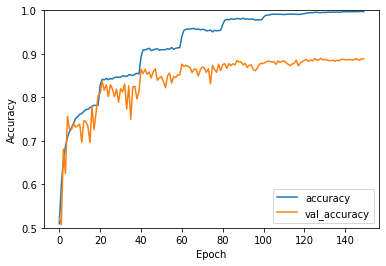

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [0]:
model.load_weights(os.path.join(path,'weights.hdf5'))
print(test_acc)

0.8882


### ANN


In [0]:
# Let's use the dimensionality reduced dataset

X_train_ANN = projected[:50000,:]
y_train_ANN = y_train#.reshape(-1,1)
X_test_ANN = projected[50000:60000,:]
y_test_ANN = y_test#.reshape(-1,1)
print(X_train_ANN.shape)
print(y_train_ANN.shape)
print(X_test_ANN.shape)
print(y_test_ANN.shape)

(50000, 100)
(50000,)
(10000, 100)
(10000,)


In [0]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X_train_ANN = sc.fit_transform(X_train_ANN)
X_test_ANN = sc.transform(X_test_ANN)

In [0]:
num_classes = 10
weight_decay = 0.00001
batch_size = 200
learning_rate = 0.05
lr_decay = 1e-6
lr_drop = 20

In [0]:
ann = models.Sequential()

ann.add(layers.Dense(256, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay), input_dim = X_train_ANN.shape[1]))
ann.add(layers.BatchNormalization())
ann.add(layers.Dropout(0.2))

ann.add(layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay)))
ann.add(layers.BatchNormalization())
ann.add(layers.Dropout(0.3))

ann.add(layers.Dense(1024, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay)))
ann.add(layers.BatchNormalization())
ann.add(layers.Dropout(0.4))

ann.add(layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay)))
ann.add(layers.BatchNormalization())
ann.add(layers.Dropout(0.3))

ann.add(layers.Dense(256, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay)))
ann.add(layers.BatchNormalization())
ann.add(layers.Dropout(0.2))

ann.add(layers.Dense(128, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay)))
ann.add(layers.BatchNormalization())
ann.add(layers.Dropout(0.1))

ann.add(layers.Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay)))
ann.add(layers.BatchNormalization())
#ann.add(layers.Dropout(0.1))

ann.add(layers.Dense(32, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay)))
ann.add(layers.BatchNormalization())
#ann.add(layers.Dropout(0.1))

ann.add(layers.Dense(16, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay)))

ann.add(layers.Dense(num_classes, activation = 'softmax', name='output_layer'))

In [0]:
sgd = tf.compat.v2.keras.optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
ann.compile(loss='sparse_categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

In [0]:
ann.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 256)               25856     
_________________________________________________________________
batch_normalization_49 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_57 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 512)               131584    
_________________________________________________________________
batch_normalization_50 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_58 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 1024)             

In [0]:
def lr_scheduler(epoch):
  return learning_rate * (0.5 ** (epoch // lr_drop))
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

In [0]:
# Fitting the ANN to the Training set
if os.path.exists(os.path.join(path,'ann_reduced.h5')):
  ann.load_weights(os.path.join(path,'ann_reduced.h5'))
  maxepochs = 0
  print("model loaded successfully")
else: 
  print ("Nothing to load")
  maxepochs = 100

ann_history = ann.fit(X_train_ANN, y_train_ANN,batch_size = batch_size, 
                            steps_per_epoch = X_train_ANN.shape[0] // batch_size,
                            epochs = maxepochs, validation_steps = X_test_ANN.shape[0] // batch_size,
                            validation_data=(X_test_ANN, y_test_ANN),callbacks=[reduce_lr],verbose=2)

model loaded successfully
Train on 50000 samples, validate on 10000 samples


In [0]:
ann.save_weights(os.path.join(path,'ann_reduced.h5'))

In [0]:
test_loss, test_acc = ann.evaluate(X_test_ANN,  y_test_ANN, verbose=2)

10000/1 - 2s - loss: 1.1411 - accuracy: 0.5979


### Downsampling


In [35]:
data = np.vstack((train_images, test_images))
labels = np.vstack((train_labels, test_labels))

images = []
for img in data:
  img=(img.flatten())              
  images.append(np.array(img))

from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(images, labels, test_size = 10000, random_state = 42)
xTrain = np.array(xTrain)
xTest = np.array(xTest)
yTrain = np.squeeze(yTrain[:50000, :])
yTest = np.squeeze(yTest[:10000, :])
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(50000, 3072)
(50000,)
(10000, 3072)
(10000,)


In [0]:
num_classes = 10
weight_decay = 0.0000#1
batch_size = 200
learning_rate = 0.001
lr_decay = 1e-6
lr_drop = 20

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
xTrain = sc.fit_transform(xTrain)
xTest = sc.transform(xTest)

In [0]:
ds = models.Sequential()

ds.add(layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay), input_dim = xTrain.shape[1]))
ds.add(layers.BatchNormalization())
ds.add(layers.Dropout(0.2))
"""
ds.add(layers.Dense(1024, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay)))
ds.add(layers.BatchNormalization())
ds.add(layers.Dropout(0.4))

ds.add(layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay)))
ds.add(layers.BatchNormalization())
ds.add(layers.Dropout(0.3))
"""
ds.add(layers.Dense(256, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay)))
ds.add(layers.BatchNormalization())
ds.add(layers.Dropout(0.2))

ds.add(layers.Dense(128, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay)))
ds.add(layers.BatchNormalization())
ds.add(layers.Dropout(0.1))

ds.add(layers.Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay), name = 'bottleneck'))

ds.add(layers.Dense(num_classes, activation = 'softmax', name='output_layer'))

sgd = tf.compat.v2.keras.optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
ds.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

"""
ann = models.Sequential()

ann.add(layers.Dense(256, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay), input_dim = X_train_ANN.shape[1]))
ann.add(layers.BatchNormalization())
ann.add(layers.Dropout(0.2))

ann.add(layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay)))
ann.add(layers.BatchNormalization())
ann.add(layers.Dropout(0.3))

ann.add(layers.Dense(1024, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay)))
ann.add(layers.BatchNormalization())
ann.add(layers.Dropout(0.4))

ann.add(layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay)))
ann.add(layers.BatchNormalization())
ann.add(layers.Dropout(0.3))

ann.add(layers.Dense(256, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay)))
ann.add(layers.BatchNormalization())
ann.add(layers.Dropout(0.2))

ann.add(layers.Dense(128, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay)))
ann.add(layers.BatchNormalization())
ann.add(layers.Dropout(0.1))

ann.add(layers.Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay)))
ann.add(layers.BatchNormalization())
#ann.add(layers.Dropout(0.1))

ann.add(layers.Dense(32, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay)))
ann.add(layers.BatchNormalization())
#ann.add(layers.Dropout(0.1))

ann.add(layers.Dense(16, activation = 'relu', kernel_regularizer=regularizers.l2(weight_decay)))

ann.add(layers.Dense(num_classes, activation = 'softmax', name='output_layer'))
"""

In [47]:
ds.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               1573376   
_________________________________________________________________
batch_normalization_23 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_24 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)              

In [61]:
# Fitting the ANN to the Training set
if os.path.exists(os.path.join(path,'ds.h5')):
  #ds.load_weights(os.path.join(path,'ds.h5'))
  maxepochs = 200
  print("model loaded successfully")
else: 
  print ("Nothing to load")
  maxepochs = 50

ds_history = ds.fit(xTrain, yTrain,batch_size = batch_size, 
                            steps_per_epoch = xTrain.shape[0] // batch_size,
                            epochs = maxepochs, validation_steps = xTest.shape[0] // batch_size,
                            validation_data=(xTest, yTest),callbacks=[reduce_lr],verbose=2)

model loaded successfully
Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 - 1s - loss: 1.1068 - accuracy: 0.6039 - val_loss: 1.6542 - val_accuracy: 0.5228
Epoch 2/200
50000/50000 - 1s - loss: 1.1110 - accuracy: 0.6017 - val_loss: 1.6700 - val_accuracy: 0.5004
Epoch 3/200
50000/50000 - 1s - loss: 1.1201 - accuracy: 0.5985 - val_loss: 1.6764 - val_accuracy: 0.5205
Epoch 4/200
50000/50000 - 1s - loss: 1.1139 - accuracy: 0.6022 - val_loss: 1.7859 - val_accuracy: 0.4780
Epoch 5/200
50000/50000 - 1s - loss: 1.1248 - accuracy: 0.5998 - val_loss: 1.6335 - val_accuracy: 0.4954
Epoch 6/200
50000/50000 - 1s - loss: 1.1189 - accuracy: 0.5988 - val_loss: 1.5753 - val_accuracy: 0.5229
Epoch 7/200
50000/50000 - 1s - loss: 1.1110 - accuracy: 0.6037 - val_loss: 1.6096 - val_accuracy: 0.5241
Epoch 8/200
50000/50000 - 1s - loss: 1.1100 - accuracy: 0.6035 - val_loss: 1.5875 - val_accuracy: 0.5155
Epoch 9/200
50000/50000 - 1s - loss: 1.1167 - accuracy: 0.6010 - val_loss: 1.6209 - 

In [0]:
ds.save_weights(os.path.join(path,'ds.h5'))

In [51]:
ds.load_weights(os.path.join(path,'ds.h5'))
test_loss, test_acc = ds.evaluate(xTest,  yTest, verbose=2)
test_acc

10000/1 - 1s - loss: 1.6452 - accuracy: 0.5691


0.5691

In [52]:
model_feat = tf.compat.v1.keras.Model(ds.inputs,ds.get_layer('bottleneck').output)

feat_train = model_feat.predict(xTrain)
print(feat_train.shape)

feat_test = model_feat.predict(xTest)
print(feat_test.shape)

(50000, 64)
(10000, 64)


In [60]:
import xgboost as xgb

xb = xgb.XGBClassifier()

xb.fit(feat_train,yTrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

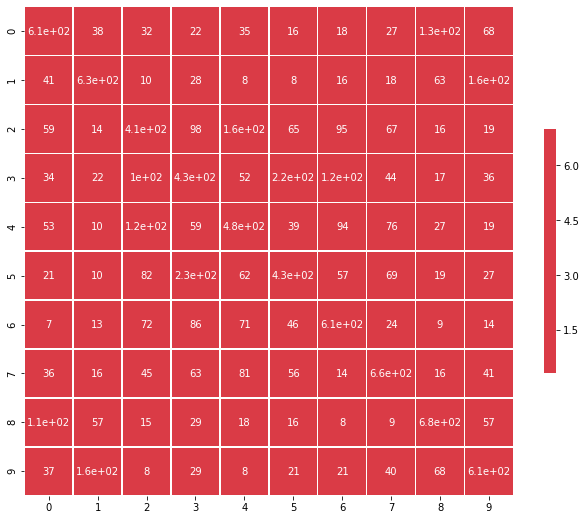

In [68]:
yxb = xb.predict(feat_test)
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix
cmxb = confusion_matrix(yTest, yxb)

df_cmxb = pd.DataFrame(cmxb, range(len(cmxb)), range(len(cmxb)))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap = True)


# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(df_cmxb, annot = True, cmap = cmap, vmax = .3, center = 0, square = True, linewidths = .5, cbar_kws = {"shrink": .5})
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini'],
    'max_depth': [100],
    'min_samples_leaf': [10],
    'max_features': ["auto"],#, "sqrt", "log2"],
    'n_estimators': [100, 150],
}

rf = RandomForestClassifier(random_state = 42)
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 10, verbose = 3)
CV_rf.fit(feat_train,yTrain)
CV_rf.best_params_

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV] criterion=gini, max_depth=100, max_features=auto, min_samples_leaf=10, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=100, max_features=auto, min_samples_leaf=10, n_estimators=100, score=0.703, total=  19.6s
[CV] criterion=gini, max_depth=100, max_features=auto, min_samples_leaf=10, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.6s remaining:    0.0s


[CV]  criterion=gini, max_depth=100, max_features=auto, min_samples_leaf=10, n_estimators=100, score=0.703, total=  19.2s
[CV] criterion=gini, max_depth=100, max_features=auto, min_samples_leaf=10, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   38.7s remaining:    0.0s


[CV]  criterion=gini, max_depth=100, max_features=auto, min_samples_leaf=10, n_estimators=100, score=0.700, total=  19.3s
[CV] criterion=gini, max_depth=100, max_features=auto, min_samples_leaf=10, n_estimators=100 
[CV]  criterion=gini, max_depth=100, max_features=auto, min_samples_leaf=10, n_estimators=100, score=0.705, total=  19.2s
[CV] criterion=gini, max_depth=100, max_features=auto, min_samples_leaf=10, n_estimators=100 
[CV]  criterion=gini, max_depth=100, max_features=auto, min_samples_leaf=10, n_estimators=100, score=0.705, total=  19.4s
[CV] criterion=gini, max_depth=100, max_features=auto, min_samples_leaf=10, n_estimators=100 
[CV]  criterion=gini, max_depth=100, max_features=auto, min_samples_leaf=10, n_estimators=100, score=0.694, total=  19.3s
[CV] criterion=gini, max_depth=100, max_features=auto, min_samples_leaf=10, n_estimators=100 
[CV]  criterion=gini, max_depth=100, max_features=auto, min_samples_leaf=10, n_estimators=100, score=0.712, total=  19.5s
[CV] criterion

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  8.1min finished


{'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'n_estimators': 150}

In [59]:
y_pred = CV_rf.predict(feat_test)
random_forest_score = metrics.accuracy_score(yTest, y_pred)
random_forest_score

0.5589

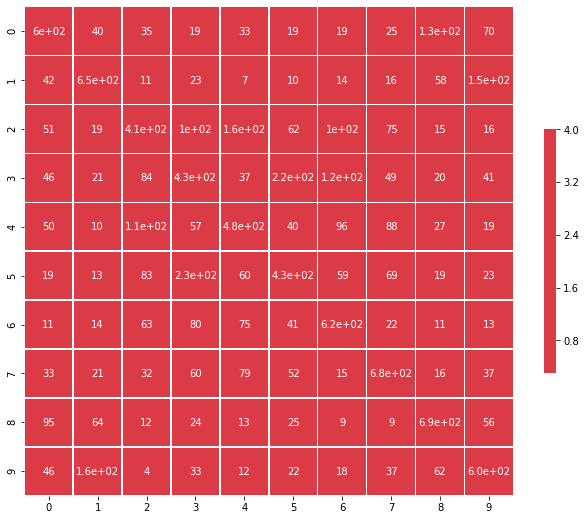

In [64]:
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest, y_pred)

df_cm = pd.DataFrame(cm, range(len(cm)), range(len(cm)))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap = True)


# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(df_cm, annot = True, cmap = cmap, vmax = .3, center = 0, square = True, linewidths = .5, cbar_kws = {"shrink": .5})
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 